In [ ]:
from os import listdir, makedirs
from os.path import isfile, join, exists
import pandas as pd
import numpy as np

old_basepath = '../basedata/PCD Data/Data before 2020-9'
new_basepath = '../basedata/PCD Data/Data after 2020-7/PCD data after 2020-7.csv'

In [282]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import os.path as osp 
from collections import defaultdict
from PIL import Image
import math 
from tqdm.notebook import tqdm 
import random

import torch 
from torch import nn 
import torch.nn.functional as F 
from torch import optim 
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import datetime


In [2]:
from os import listdir
from os.path import join
import pandas as pd

data_base_path = 'prepared_data/stations'
to_use_base_path = 'prepared_data/to_uses'
count = 0
start = 0
i = 0
for station in listdir(data_base_path):
    if start <= i:
        df = pd.read_csv(join(data_base_path, station))
        to_use = pd.read_csv(join(to_use_base_path, station))
        df = df.set_index('datetime').loc[to_use['datetime']]
        count = df[['CO', 'NO2', 'SO2', 'O3', 'PM10', 'Temp', 'Rain', 'PM25']].isna().sum().sum()
        if i == 4:
            break
        # for col in df.columns:
        #     for dt in df[col][df[col].isna()]:
        #         scrape(lat, long, datetime, col)
    i += 1
    # if((df.isna().sum() > 0).sum() > 1):
    #     print((df.isna().sum() > 0).sum() > 1)
    #     break
count

10080

In [300]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
service = ChromeService(executable_path=ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
import time

def scrape(url):
    # url = f'https://earth.nullschool.net/chem/surface/level/anim=off/overlay=so2smass/equirectangular/loc={lng},{lat}'
    #go to web/#current
    driver.get(url=url)
    element = WebDriverWait(driver,9999).until(EC.visibility_of_element_located((By.XPATH, '//*[@id="spotlight-panel"]/div[3]/div')))
    data_status = driver.find_element(By.XPATH,'/html/body/main/div[3]/div[1]/div')
    if data_status.text=="Downloading...":
        while True:
            time.sleep(0.05)
            data_status = driver.find_element(By.XPATH,'/html/body/main/div[3]/div[1]/div')
            if data_status.text=="Downloading...":
                continue
            else :
                break
    #so2
    data = element.text.split(' ')[0]
    return data

from os import makedirs
from os.path import join
import pandas as pd
import pytz

station_lat_long = pd.read_csv('prepared_data/others/station_lat_long.csv', usecols=['stationIDs', 'lats', 'longs'])
data_base_path = 'prepared_data/stations'
to_use_base_path = 'prepared_data/to_uses'
scraped_base_path = 'prepared_data/scraped'
makedirs(scraped_base_path, exist_ok=True)
start = 1
stop = 2
for i in range(start, stop):
    cur_station = station_lat_long.iloc[i]
    fn = f'{cur_station.stationIDs}.csv'
    df = pd.read_csv(join(data_base_path, fn)).set_index('datetime')
    to_use = pd.read_csv(join(to_use_base_path, fn),usecols=['datetime', 'set_no', 'flag']).set_index('datetime')
    df = df.merge(to_use, left_on='datetime', right_on='datetime')
    break
    # df.index = pd.to_datetime(df.index , format='%Y-%m-%d %H:%M:%S%z')
    # for datetime in df.index:
    #     datetime_utc = datetime.astimezone(pytz.utc)
    #     lat = station_lat_long.iloc[i]['lats']
    #     lng = station_lat_long.iloc[i]['longs']
    #     year = datetime_utc.year
    #     month = datetime_utc.month
    #     day = datetime_utc.day
    #     hour = datetime_utc.hour
    # #     urls = {
    #         'PM25':f'https://earth.nullschool.net/#{year}/{month}/{day}/{hour}00Z/particulates/surface/level/anim=off/overlay=pm2.5/equirectangular/loc={lng},{lat}',
    #         'PM10':f'https://earth.nullschool.net/#{year}/{month}/{day}/{hour}00Z/particulates/surface/level/anim=off/overlay=pm10/equirectangular/loc={lng},{lat}',
    #         'NO2':f'https://earth.nullschool.net/#{year}/{month}/{day}/{hour}00Z/chem/surface/level/anim=off/overlay=no2/equirectangular/loc={lng},{lat}',
    #         'SO2':f'https://earth.nullschool.net/#{year}/{month}/{day}/{hour}00Z/chem/surface/level/anim=off/overlay=so2smass/equirectangular/loc={lng},{lat}',
    #         'CO':f'https://earth.nullschool.net/#{year}/{month}/{day}/{hour}00Z/chem/surface/level/anim=off/overlay=cosc/equirectangular/loc={lng},{lat}',
    #         'Rain':f'https://earth.nullschool.net/#{year}/{month}/{day}/{hour}00Z/wind/surface/level/anim=off/overlay=relative_humidity/equirectangular/loc={lng},{lat}',
    #         'Temp':f'https://earth.nullschool.net/#{year}/{month}/{day}/{hour}00Z/wind/surface/level/anim=off/overlay=temp/equirectangular/loc={lng},{lat}'
    #     }
    #     cur_row = df.loc[datetime]
    #     na_checker = cur_row.isna()
    #     for col in cur_row.index:
    #         if na_checker[col] and col in urls:
    #             data = scrape(urls[col])
    #             df.loc[datetime, col] = data
    # df.to_csv(join(scraped_base_path, fn))




====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome
Driver [/Users/grniss/.wdm/drivers/chromedriver/mac64_m1/101.0.4951.41/chromedriver] found in cache


In [302]:
df.groupby(['set_no', 'flag'])

In [312]:
set_no = 0
df.iloc[set_no*24:set_no*24+24]

,CO,NO2,SO2,O3,PM10,WS,WD,Temp,Rain,PM25,set_no,flag
datetime,,,,,,,,,,,,
2019-07-04 03:00:00+07:00,0.5,8.0,1.0,4.0,22.0,0.8,261.0,25.3,96.0,11.0,36,I
2019-07-04 06:00:00+07:00,0.5,7.0,1.0,8.0,19.0,1.3,240.0,24.8,92.0,8.0,36,I
2019-07-04 09:00:00+07:00,0.7,13.0,3.5,5.0,25.0,2.3,223.0,25.6,88.0,10.0,36,I
2019-07-04 12:00:00+07:00,0.5,7.0,1.0,19.0,29.0,2.4,211.0,28.6,74.0,11.0,36,I
2019-07-04 15:00:00+07:00,0.5,6.0,1.0,30.0,24.0,2.0,223.0,29.8,72.0,8.0,36,I
2019-07-04 18:00:00+07:00,0.5,8.0,0.0,13.0,22.0,4.2,209.0,26.6,88.0,8.0,36,I
2019-07-04 21:00:00+07:00,0.6,12.0,0.0,8.0,11.0,2.5,193.0,25.9,88.0,5.0,36,I
2019-07-05 00:00:00+07:00,0.5,12.0,0.0,3.0,25.0,1.4,155.0,26.6,86.0,8.0,36,I
2019-07-05 03:00:00+07:00,0.6,12.0,1.0,4.0,20.0,1.7,155.0,25.4,90.0,5.0,36,O


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import os.path as osp 
from collections import defaultdict
from PIL import Image
import math 
from tqdm.notebook import tqdm 
import random

import torch 
from torch import nn 
import torch.nn.functional as F 
from torch import optim 
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import datetime
from sklearn.preprocessing import MinMaxScaler


In [149]:
class ForecastDataset(Dataset):
    def __init__(self, file_dir):
      self.file_dir = file_dir
      df = pd.read_csv(file_dir)
      df = df.drop(columns=['datetime', 'set_no', 'flag'])
      scaler = MinMaxScaler()
      scaler.fit_transform(df)
      scaler.inverse_transform(df)
      data = []
      for i in range(len(df)//24):
        iov = df.iloc[i*24:i*24+24]
        input = iov.iloc[:8]
        output = iov.iloc[8:16]
        validate = iov.iloc[16:]
        data.append({'input':input, 'output':output, 'validate':validate})
      self.data = data
      self.scaler = scaler
      self.rs = 0
      np.random.seed(0)
      idx_mapper = np.random.choice(np.arange(len(data)), size=len(data), replace=False)
      self.idx_mapper = idx_mapper

    def __len__(self):
      return self.num_data
        
    def __getitem__(self, idx): 
      data = self.data[self.idx_mapper[idx]]
      if idx == len(self.data) - 1:
        rs = self.rs + 1
        self.rs = rs
        np.random.seed(rs)
        idx_mapper = np.random.choice(np.arange(len(self.data)), size=len(data), replace=False)
        self.idx_mapper = idx_mapper
      input = data['input']
      output = data['output']
      validate = data['validate']
      return input, output, validate

In [150]:
df = pd.read_csv('prepared_data/scraped/76t.csv')

In [618]:
df = pd.read_csv('prepared_data/dataset1.csv', usecols=['PM25', 'CO', 'NO2', 'SO2', 'O3', 'lat', 'long'])[['PM25', 'CO', 'NO2', 'SO2', 'O3', 'lat', 'long']]

In [621]:
df = df[['PM25', 'CO', 'NO2', 'SO2', 'O3', 'lat', 'long']]
df

,PM25,CO,NO2,SO2,O3,lat,long
0,11.0,0.61,6.0,1.0,12.0,13.617995,100.556214
1,11.0,0.58,5.0,1.0,13.0,13.617995,100.556214
2,11.0,0.58,5.0,1.0,13.0,13.617995,100.556214
3,11.0,0.58,5.0,1.0,13.0,13.617995,100.556214
4,11.0,0.58,5.0,1.0,13.0,13.617995,100.556214
...,...,...,...,...,...,...,...
77755,11.0,0.02,1.0,1.0,23.0,7.570238,99.588743
77756,10.0,0.06,8.0,0.0,21.0,7.570238,99.588743
77757,11.0,0.13,6.0,0.0,15.0,7.570238,99.588743
77758,12.0,0.25,5.0,0.0,5.0,7.570238,99.588743


In [503]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [176]:
train_dataset = ForecastDataset('prepared_data/scraped/76t.csv')
train_loader = DataLoader(train_dataset, batch_size=40, shuffle=True, pin_memory=True)

# Start here

In [767]:
class ForecastDataset(Dataset):
    def __init__(self, file_dir, scaler):
        self.file_dir = file_dir
        df = pd.read_csv(file_dir, usecols=['CO', 'NO2', 'SO2', 'O3', 'PM25', 'lat', 'long'])[['PM25', 'CO', 'NO2', 'SO2', 'O3', 'lat', 'long']]
        arr = scaler.transform(df).astype(np.float32)
        data = []
        for i in range(len(arr)//72):
            iov = arr[i*72:i*72+72]
            input = iov[:24]
            output = iov[24:48]
            validate = iov[48:]
            data.append({'input':input, 'output':output, 'validate':validate})
        self.data = data
        self.data_len = len(data)
        self.scaler = scaler
        self.rs = 0
        np.random.seed(0)
        idx_mapper = np.random.choice(np.arange(self.data_len), size=self.data_len, replace=False)
        self.idx_mapper = idx_mapper

    def __getitem__(self, index):
        to_get = self.idx_mapper[index]
        data = self.data[to_get]
        if index == len(self.data) - 1:
            rs = self.rs + 1
            self.rs = rs
            np.random.seed(rs)
            idx_mapper = np.random.choice(np.arange(self.data_len), size=self.data_len, replace=False)
            self.idx_mapper = idx_mapper
        input = data['input']
        output = data['output']
        validate = data['validate']
        return input, output, validate

    def __len__(self):
        return self.data_len

In [768]:
df = pd.read_csv('prepared_data/dataset1.csv', usecols=['CO', 'NO2', 'SO2', 'O3', 'PM25', 'lat', 'long'])[['PM25', 'CO', 'NO2', 'SO2', 'O3', 'lat', 'long']]
scaler = MinMaxScaler()
scaler.fit(df)
target_scale = 1/scaler.scale_[0]

In [778]:
df

,PM25,CO,NO2,SO2,O3,lat,long
0,11.0,0.61,6.0,1.0,12.0,13.617995,100.556214
1,11.0,0.58,5.0,1.0,13.0,13.617995,100.556214
2,11.0,0.58,5.0,1.0,13.0,13.617995,100.556214
3,11.0,0.58,5.0,1.0,13.0,13.617995,100.556214
4,11.0,0.58,5.0,1.0,13.0,13.617995,100.556214
...,...,...,...,...,...,...,...
77755,11.0,0.02,1.0,1.0,23.0,7.570238,99.588743
77756,10.0,0.06,8.0,0.0,21.0,7.570238,99.588743
77757,11.0,0.13,6.0,0.0,15.0,7.570238,99.588743
77758,12.0,0.25,5.0,0.0,5.0,7.570238,99.588743


In [769]:

forecast_dataset = ForecastDataset('prepared_data/dataset1.csv', scaler)
forecast_dataloader = DataLoader(forecast_dataset, batch_size=36, pin_memory=True)

In [770]:
criterion = nn.MSELoss()

In [771]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [798]:
class Lstm1Layer(nn.Module):
    def __init__(self):
        super(Lstm1Layer, self).__init__()
        self.lstm = nn.LSTM(input_size=7, hidden_size=24, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.dense = nn.

    def forward(self, x):
        outputs, _ = self.lstm(x)
        y = self.dropout(outputs)
        return y[:,-1,:]

In [799]:
from torchinfo import summary
model = Lstm1Layer()
summary(model, input_size=(1, 24, 7))

Layer (type:depth-idx)                   Output Shape              Param #
Lstm1Layer                               --                        --
├─LSTM: 1-1                              [1, 24, 24]               3,168
├─Dropout: 1-2                           [1, 24, 24]               --
Total params: 3,168
Trainable params: 3,168
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.02

In [809]:
# Hyperparameters and other configs
config = {
    'architecture': 'feedforward',
    'lr': 5e-4,
    'scheduler_factor': 0.5,
    'scheduler_patience': 2,
    'scheduler_min_lr': 1e-7,
    'epochs': 1000
}

# Model
model = Lstm1Layer()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=config['lr'])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    'min', 
    factor=config['scheduler_factor'], 
    patience=config['scheduler_patience'], 
    min_lr=config['scheduler_min_lr']
)

In [810]:
outputs[:,:,0]

tensor([[0.2264, 0.2264, 0.2390, 0.2516, 0.2642, 0.2767, 0.3145, 0.3522, 0.3648,
         0.3774, 0.3899, 0.4025, 0.3899, 0.3774, 0.3396, 0.3019, 0.2767, 0.2516,
         0.2264, 0.2138, 0.2138, 0.2013, 0.1887, 0.2013],
        [0.5409, 0.5535, 0.5409, 0.5409, 0.5409, 0.5535, 0.5535, 0.5660, 0.5535,
         0.5157, 0.5031, 0.5157, 0.5031, 0.4780, 0.4654, 0.4528, 0.4528, 0.5031,
         0.5535, 0.5660, 0.5660, 0.5786, 0.5660, 0.5660],
        [0.3648, 0.3019, 0.2516, 0.1887, 0.1761, 0.1761, 0.1635, 0.1384, 0.1258,
         0.1258, 0.1258, 0.1258, 0.1384, 0.1384, 0.1384, 0.1384, 0.1258, 0.1384,
         0.1509, 0.1509, 0.1509, 0.1509, 0.1635, 0.1887],
        [0.1132, 0.1132, 0.1132, 0.1132, 0.1132, 0.1132, 0.1132, 0.1258, 0.1258,
         0.1509, 0.1509, 0.1509, 0.1509, 0.1635, 0.1635, 0.1635, 0.1635, 0.1635,
         0.1635, 0.1887, 0.1761, 0.1761, 0.1761, 0.1887],
        [0.1258, 0.1384, 0.1509, 0.1384, 0.1132, 0.1132, 0.1509, 0.1635, 0.1509,
         0.1384, 0.1384, 0.1635, 0.1761

In [811]:
for param in model.parameters():
    print(param)
    break

Parameter containing:
tensor([[ 5.0792e-02, -4.5578e-03, -2.4273e-02,  5.5663e-02,  1.4283e-01,
          1.2023e-02,  2.2388e-02],
        [ 1.1993e-01,  8.5009e-02, -7.8383e-02,  2.1304e-02, -1.6808e-01,
          3.4500e-02, -6.7397e-02],
        [-1.7861e-03, -1.8714e-01, -9.1125e-02,  6.8865e-02, -9.1887e-02,
          2.5472e-02, -1.6444e-01],
        [ 9.4227e-02, -3.8086e-02, -4.5703e-02,  5.7102e-02, -5.5343e-02,
         -5.1201e-02,  7.4420e-02],
        [-5.2213e-02,  7.0405e-02,  1.4397e-01,  1.7066e-01,  1.2781e-01,
          1.1761e-01,  1.5604e-01],
        [ 1.4605e-01,  8.7067e-02,  1.9277e-01, -2.2116e-02,  4.7696e-02,
         -1.3796e-01,  4.8960e-02],
        [ 1.5455e-01, -1.9363e-01,  8.1443e-02,  7.6783e-02, -3.8529e-02,
         -5.8919e-02, -1.0231e-01],
        [-2.0039e-01,  8.9946e-02, -6.7575e-02,  1.6168e-01, -1.0966e-01,
          1.7683e-01, -1.9096e-01],
        [-5.0859e-02, -1.9137e-02,  1.4210e-01,  1.9372e-02, -2.0250e-01,
          1.5297e-01, -4

In [812]:
train_losses = []
val_losses = []
learning_rates = []

for epoch in range(config['epochs']):  # loop over the dataset multiple times
    
    # Training
    train_loss = []
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)

    # Flag model as training. Some layers behave differently in training and
    # inference modes, such as dropout, BN, etc.
    model.train()

    print(f"Training epoch {epoch+1}...")
    print(f"Current LR: {current_lr}")

    for i, (inputs, outputs, _) in enumerate((forecast_dataloader)):
        # Transfer data from cpu to gpu
        inputs = inputs.to(device)
        outputs = outputs.to(device)

        # Reset the gradient
        optimizer.zero_grad()

        # Predict
        y_pred = model(inputs)

        # Calculate loss
        loss = torch.sqrt(criterion(y_pred, outputs[:, :, 0]))
        # break

        # Compute gradient
        loss.backward()
        
        # Update parameters
        optimizer.step()

        # Log stuff
        train_loss.append(loss)
    # break    
    avg_train_loss = torch.stack(train_loss).mean().item()
    train_losses.append(avg_train_loss)
    print(f"Epoch {epoch+1} train loss: {avg_train_loss:.4f}")
    
    # Validation
    model.eval()
    with torch.no_grad(): # No gradient is required during validation
        print(f"Validating epoch {epoch+1}")
        val_loss = []
        for i, (_, outputs, validates) in enumerate((forecast_dataloader)):
            # Transfer data from cpu to gpu
            outputs = outputs.to(device)
            validates = validates.to(device)
            
            # Predict
            y_pred = model(inputs)

            # Calculate loss
            loss = torch.sqrt(criterion(y_pred, validates[:, :, 0]))

            # Log stuff
            val_loss.append(loss)
        
        avg_val_loss = torch.stack(val_loss).mean().item()
        val_losses.append(avg_val_loss)
        print(f"Epoch {epoch+1} val loss: {avg_val_loss:.4f}")

        # LR adjustment with scheduler
        scheduler.step(avg_val_loss)

        # Save checkpoint if val_loss is the best we got
        best_val_loss = np.inf if epoch == 0 else min(val_losses[:-1])
        if avg_val_loss < best_val_loss:
            # Save whatever you want
            state = {
                'epoch': epoch,
                'model': model.state_dict(),
                'optimizer': optimizer.state_dict(),
                'scheduler': scheduler.state_dict(),
                'train_loss': avg_train_loss,
                'val_loss': avg_val_loss,
                'best_val_loss': best_val_loss,
            }
            
            print(f"Saving new best model..")
            torch.save(state, 'model.pth.tar')
    

print('Finished Training')

Training epoch 1...
Current LR: 0.0005
Epoch 1 train loss: 0.3062
Validating epoch 1
Epoch 1 val loss: 0.2763
Saving new best model..
Training epoch 2...
Current LR: 0.0005
Epoch 2 train loss: 0.2724
Validating epoch 2
Epoch 2 val loss: 0.2517
Saving new best model..
Training epoch 3...
Current LR: 0.0005
Epoch 3 train loss: 0.2516
Validating epoch 3
Epoch 3 val loss: 0.2339
Saving new best model..
Training epoch 4...
Current LR: 0.0005
Epoch 4 train loss: 0.2362
Validating epoch 4
Epoch 4 val loss: 0.2148
Saving new best model..
Training epoch 5...
Current LR: 0.0005
Epoch 5 train loss: 0.2254
Validating epoch 5
Epoch 5 val loss: 0.2089
Saving new best model..
Training epoch 6...
Current LR: 0.0005
Epoch 6 train loss: 0.2180
Validating epoch 6
Epoch 6 val loss: 0.2042
Saving new best model..
Training epoch 7...
Current LR: 0.0005
Epoch 7 train loss: 0.2116
Validating epoch 7
Epoch 7 val loss: 0.2011
Saving new best model..
Training epoch 8...
Current LR: 0.0005
Epoch 8 train loss: 0.2

KeyboardInterrupt: 

In [ ]:
y_pred.shape

torch.Size([36, 24])

In [ ]:
outputs.shape

torch.Size([36, 24, 7])

In [ ]:
outputs[:,:,0].shape

torch.Size([36, 24])

In [20]:
a = pd.DataFrame([1,2,3,4,5,6])

In [29]:
(sfa.isna().sum(axis=1) > 0).sum()

930111

In [17]:
sfa = pd.read_csv('../basedata/SFA Data /ID_DATA_SFA.csv')


/var/folders/zd/cxdhxy155s9616ldb9v5mnrw0000gn/T/ipykernel_15809/1505892665.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  sfa = pd.read_csv('../basedata/SFA Data /ID_DATA_SFA.csv')


In [19]:
sfa.columns

Index(['Unnamed: 0', 'device_id', 'time_aq', 'temp', 'humid', 'pm25_corrected',
       'pm10_corrected'],
      dtype='object')

In [833]:
sfa.isna().sum(axis=1)

0           0
1           0
2           0
3           0
4           0
           ..
12546610    0
12546611    0
12546612    2
12546613    0
12546614    0
Length: 12546615, dtype: int64

In [834]:
sfa[sfa.isna().sum(axis=1) == 0]

,Unnamed: 0,device_id,time_aq,temp,humid,pm25_corrected,pm10_corrected
0,0,30AEA49CC204,2020-07-20 18:16:44.737,35.8,59.0,9.1,10.6
1,1,868333030873646,2020-07-20 18:17:42.470,31.2,78.3,14.1,29.1
2,2,868333030868281,2020-07-20 18:17:52.707,33.1,67.9,11.2,23.1
3,3,868333030879387,2020-07-20 18:18:23.430,29.3,83.2,12.6,26.8
4,4,30AEA49CC204,2020-07-20 18:21:59.207,35.8,61.0,7.9,8.4
...,...,...,...,...,...,...,...
12546609,12546609,868333031255157,2022-01-30 18:31:43.730,28.9,33.4,21.6,41.0
12546610,12546610,868333031268382,2022-01-30 18:31:45.387,32.4,79.3,10.4,23.1
12546611,12546611,868333031252881,2022-01-30 18:31:45.420,37.8,43.5,20.8,39.5
12546613,12546613,868333032102655,2022-01-30 18:31:47.543,36.0,33.6,17.1,35.0


In [871]:
dt_col = pd.to_datetime(sfa['time_aq']+' +0700', format='%Y-%m-%d %H:%M:%S.%f %z').copy()
sfa['datetime'] = dt_col.dt.round('H')

In [873]:
sfa

,Unnamed: 0,device_id,time_aq,temp,humid,pm25_corrected,pm10_corrected,datetime
0,0,30AEA49CC204,2020-07-20 18:16:44.737,35.8,59.0,9.1,10.6,2020-07-20 18:00:00+07:00
1,1,868333030873646,2020-07-20 18:17:42.470,31.2,78.3,14.1,29.1,2020-07-20 18:00:00+07:00
2,2,868333030868281,2020-07-20 18:17:52.707,33.1,67.9,11.2,23.1,2020-07-20 18:00:00+07:00
3,3,868333030879387,2020-07-20 18:18:23.430,29.3,83.2,12.6,26.8,2020-07-20 18:00:00+07:00
4,4,30AEA49CC204,2020-07-20 18:21:59.207,35.8,61.0,7.9,8.4,2020-07-20 18:00:00+07:00
...,...,...,...,...,...,...,...,...
12546610,12546610,868333031268382,2022-01-30 18:31:45.387,32.4,79.3,10.4,23.1,2022-01-30 19:00:00+07:00
12546611,12546611,868333031252881,2022-01-30 18:31:45.420,37.8,43.5,20.8,39.5,2022-01-30 19:00:00+07:00
12546612,12546612,868333031266402,2022-01-30 18:31:46.903,NaN,NaN,26.0,46.9,2022-01-30 19:00:00+07:00
12546613,12546613,868333032102655,2022-01-30 18:31:47.543,36.0,33.6,17.1,35.0,2022-01-30 19:00:00+07:00


In [877]:
min_count = 1000000
count_list = []
for device in sfa['device_id'].unique():
    count = len(sfa[sfa['device_id'] == device].groupby('datetime').mean())
    if count < min_count:
        min_count = count
    count_list.append(count)
min_count

1

In [882]:
1086946/24

45289.416666666664

In [887]:
example.columns

Index(['Unnamed: 0', 'device_id', 'time_aq', 'temp', 'humid', 'pm25_corrected',
       'pm10_corrected', 'datetime'],
      dtype='object')

In [886]:
example.groupby('datetime').mean().drop(columns=['Unnamed: 0'])

,temp,humid,pm25_corrected,pm10_corrected
datetime,,,,
2020-07-20 18:00:00+07:00,35.766667,60.333333,8.733333,9.600000
2020-07-20 19:00:00+07:00,35.672727,62.545455,8.809091,9.654545
2020-07-20 20:00:00+07:00,35.541667,61.500000,8.750000,9.483333
2020-07-20 21:00:00+07:00,35.372727,61.363636,8.172727,9.172727
2020-07-20 22:00:00+07:00,34.725000,60.750000,11.175000,12.300000
...,...,...,...,...
2021-11-25 20:00:00+07:00,33.841667,94.000000,16.933333,19.658333
2021-11-25 21:00:00+07:00,33.800000,94.000000,16.890909,19.481818
2021-11-25 22:00:00+07:00,33.681818,94.000000,18.218182,21.063636


In [890]:
sfa_info = sfa_info[sfa_info.isna().sum(axis=1) == 0]

In [900]:
sfa_info

,id,device_id,name_th,name_en,lat,long
0,1,3131353861378310,โรงเรียนสาธิตจุฬาลงกรณ์มหาวิทยาลัยฝ่ายมัธยม - ...,"Canteen, Chulalongkorn University Demonstratio...",13.735575,100.527319
1,2,3F3135385D379018,โรงเรียนสาธิตจุฬาลงกรณ์มหาวิทยาลัยฝ่ายมัธยม - ...,"Gate I, Chulalongkorn University Demonstration...",13.735706,100.526395
2,3,3F3032356F378905,คณะสถาปัตยกรรมศาสตร์ - โถงอาคารเรียน,"Faculty of Architecture, Chulalongkorn University",13.739742,100.530825
3,4,3131353877377D18,คณะพาณิชยศาสตร์และการบัญชี,"Faculty of Commerce and Accountancy, Chulalong...",13.734072,100.530161
4,5,3131353867376B19,อาคารจามจุรี 9,"Chamchuri 8 Building, Chulalongkorn University",13.735789,100.525061
...,...,...,...,...,...,...
517,611,868333032096105,โรงไฟฟ้าเชียงรากน้อย,Chiang Rak Noi Power Plant,14.097683,100.570965
518,612,868333032102655,"บริษัท บี.กริม บีไอพี เพาเวอร์ 1,2 จำกัด","B.Grimm BIP Power 1,2 Limited",13.975322,100.565462
519,613,868333032107530,ป้อมจราจร ศีลคุณ สภ.บางพลี,Police Box (Bang Phli),13.633908,100.709253
520,614,868333032084549,สำนักงานเทศบาลเมืองลัดหลวง,Lat Luang Municipality Office,13.629980,100.532879


In [899]:
pd.read_csv('prepared_data/sfa_devices/30AEA49CC204.csv')

,datetime,temp,humid,pm25_corrected,pm10_corrected
0,2020-07-20 18:00:00+07:00,35.766667,60.333333,8.733333,9.600000
1,2020-07-20 19:00:00+07:00,35.672727,62.545455,8.809091,9.654545
2,2020-07-20 20:00:00+07:00,35.541667,61.500000,8.750000,9.483333
3,2020-07-20 21:00:00+07:00,35.372727,61.363636,8.172727,9.172727
4,2020-07-20 22:00:00+07:00,34.725000,60.750000,11.175000,12.300000
...,...,...,...,...,...
9715,2021-11-25 20:00:00+07:00,33.841667,94.000000,16.933333,19.658333
9716,2021-11-25 21:00:00+07:00,33.800000,94.000000,16.890909,19.481818
9717,2021-11-25 22:00:00+07:00,33.681818,94.000000,18.218182,21.063636
9718,2021-11-25 23:00:00+07:00,33.600000,94.000000,18.116667,20.941667


In [897]:
sfa_info['device_id']

0      3131353861378310
1      3F3135385D379018
2      3F3032356F378905
3      3131353877377D18
4      3131353867376B19
             ...       
517     868333032096105
518     868333032102655
519     868333032107530
520     868333032084549
521     868333032108546
Name: device_id, Length: 444, dtype: object

In [874]:
sfa.groupby(['datetime', 'device_id']).mean()

Unnamed: 0       temp      humid  \
datetime                  device_id                                           
2020-07-20 18:00:00+07:00 30AEA49CC204            4.0  35.766667  60.333333   
                          868333030868281         6.0  33.033333  69.233333   
                          868333030873646         5.0  31.200000  78.566667   
                          868333030879387         7.0  29.300000  83.266667   
2020-07-20 19:00:00+07:00 30AEA49CC204           34.0  35.672727  62.545455   
...                                               ...        ...        ...   
2022-01-30 19:00:00+07:00 868333032108462  12546499.0  36.100000  48.900000   
                          868333032108546  12546555.0  33.700000  48.300000   
                          868333032108967  12546545.0  35.500000  38.900000   
                          868333032109163  12546549.0  34.400000  44.100000   
                          868333032109270  12546524.0  34.600000  27.300000   

                                           pm25_corrected  pm10_corrected  
datetime                  device_id                                        
2020-07-20 18:00:00+07:00 30AEA49CC204           8.733333        9.600000  
                          868333030868281       10.433333       21.866667  
                          868333030873646       12.400000       25.333333  
                          868333030879387       13.133333       27.566667  
2020-07-20 19:00:00+07:00 30AEA49CC204           8.809091        9.654545  
...                                                   ...             ...  
2022-01-30 19:00:00+07:00 868333032108462       14.100000       30.500000  
                          868333032108546       17.100000       33.500000  
                          868333032108967       35.700000       62.600000  
                          868333032109163       22.300000       41.700000  
                          868333032109270       41.600000       73.800000  

[1086946 rows x 5 columns]

In [845]:
example = sfa[sfa['device_id'] == '30AEA49CC204']

In [847]:
example['time_aq']+' +0700'

0          2020-07-20 18:16:44.737+0700
4          2020-07-20 18:21:59.207+0700
8          2020-07-20 18:27:13.817+0700
12         2020-07-20 18:32:28.387+0700
17         2020-07-20 18:37:43.093+0700
                       ...             
8746546    2021-11-25 23:43:59.407+0700
8746693    2021-11-25 23:49:14.200+0700
8746840    2021-11-25 23:54:29.067+0700
8746982    2021-11-25 23:59:44.157+0700
8747129    2021-11-26 00:04:59.017+0700
Name: time_aq, Length: 111112, dtype: object

In [ ]:
example

In [854]:
a = pd.to_datetime(example['time_aq']+' +0700', format='%Y-%m-%d %H:%M:%S.%f %z')

In [855]:
a.dt.month

0           7
4           7
8           7
12          7
17          7
           ..
8746546    11
8746693    11
8746840    11
8746982    11
8747129    11
Name: time_aq, Length: 111112, dtype: int64

In [864]:
dt_col = pd.to_datetime(example['time_aq']+' +0700', format='%Y-%m-%d %H:%M:%S.%f %z').copy()
example['datetime'] = dt_col.dt.round('H')

/var/folders/zd/cxdhxy155s9616ldb9v5mnrw0000gn/T/ipykernel_1465/3876427225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['datetime'] = dt_col.dt.round('H')


In [870]:
example.groupby('datetime').mean()

,Unnamed: 0,temp,humid,pm25_corrected,pm10_corrected
datetime,,,,,
2020-07-20 18:00:00+07:00,4.000000e+00,35.766667,60.333333,8.733333,9.600000
2020-07-20 19:00:00+07:00,3.400000e+01,35.672727,62.545455,8.809091,9.654545
2020-07-20 20:00:00+07:00,8.016667e+01,35.541667,61.500000,8.750000,9.483333
2020-07-20 21:00:00+07:00,1.288182e+02,35.372727,61.363636,8.172727,9.172727
2020-07-20 22:00:00+07:00,1.729167e+02,34.725000,60.750000,11.175000,12.300000
...,...,...,...,...,...
2021-11-25 20:00:00+07:00,8.740482e+06,33.841667,94.000000,16.933333,19.658333
2021-11-25 21:00:00+07:00,8.742119e+06,33.800000,94.000000,16.890909,19.481818
2021-11-25 22:00:00+07:00,8.743679e+06,33.681818,94.000000,18.218182,21.063636


In [856]:
a.dt.round('H')

0         2020-07-20 18:00:00+07:00
4         2020-07-20 18:00:00+07:00
8         2020-07-20 18:00:00+07:00
12        2020-07-20 19:00:00+07:00
17        2020-07-20 19:00:00+07:00
                     ...           
8746546   2021-11-26 00:00:00+07:00
8746693   2021-11-26 00:00:00+07:00
8746840   2021-11-26 00:00:00+07:00
8746982   2021-11-26 00:00:00+07:00
8747129   2021-11-26 00:00:00+07:00
Name: time_aq, Length: 111112, dtype: datetime64[ns, pytz.FixedOffset(420)]

In [850]:
pd.to_datetime(example['time_aq']+' +0700', format='%Y-%m-%d %H:%M:%S.%f %z')

AttributeError: 'Series' object has no attribute 'hour'

In [838]:
sfa_info = pd.read_csv('../basedata/SFA Data /ID_INFO_SFA.csv')

In [842]:
sfa

,Unnamed: 0,device_id,time_aq,temp,humid,pm25_corrected,pm10_corrected
0,0,30AEA49CC204,2020-07-20 18:16:44.737,35.8,59.0,9.1,10.6
1,1,868333030873646,2020-07-20 18:17:42.470,31.2,78.3,14.1,29.1
2,2,868333030868281,2020-07-20 18:17:52.707,33.1,67.9,11.2,23.1
3,3,868333030879387,2020-07-20 18:18:23.430,29.3,83.2,12.6,26.8
4,4,30AEA49CC204,2020-07-20 18:21:59.207,35.8,61.0,7.9,8.4
...,...,...,...,...,...,...,...
12546610,12546610,868333031268382,2022-01-30 18:31:45.387,32.4,79.3,10.4,23.1
12546611,12546611,868333031252881,2022-01-30 18:31:45.420,37.8,43.5,20.8,39.5
12546612,12546612,868333031266402,2022-01-30 18:31:46.903,NaN,NaN,26.0,46.9
12546613,12546613,868333032102655,2022-01-30 18:31:47.543,36.0,33.6,17.1,35.0


In [841]:
sfa_info

,id,device_id,name_th,name_en,lat,long
0,1,3131353861378310,โรงเรียนสาธิตจุฬาลงกรณ์มหาวิทยาลัยฝ่ายมัธยม - ...,"Canteen, Chulalongkorn University Demonstratio...",13.735575,100.527319
1,2,3F3135385D379018,โรงเรียนสาธิตจุฬาลงกรณ์มหาวิทยาลัยฝ่ายมัธยม - ...,"Gate I, Chulalongkorn University Demonstration...",13.735706,100.526395
2,3,3F3032356F378905,คณะสถาปัตยกรรมศาสตร์ - โถงอาคารเรียน,"Faculty of Architecture, Chulalongkorn University",13.739742,100.530825
3,4,3131353877377D18,คณะพาณิชยศาสตร์และการบัญชี,"Faculty of Commerce and Accountancy, Chulalong...",13.734072,100.530161
4,5,3131353867376B19,อาคารจามจุรี 9,"Chamchuri 8 Building, Chulalongkorn University",13.735789,100.525061
...,...,...,...,...,...,...
520,614,868333032084549,สำนักงานเทศบาลเมืองลัดหลวง,Lat Luang Municipality Office,13.629980,100.532879
521,615,868333032108546,โรงเรียนหลวงพ่อปานคลองด่านอนุสรณ์,Luang Por Pan Khlong Dan Anusorn School,13.506631,100.833071
522,616,868333032082196,exim bank,exim bank,NaN,NaN
523,617,868333032087971,,,NaN,NaN


# map_traffic

In [32]:
sfa['time_aq'] + '+07:00'

0           2020-07-20 18:16:44.737 +0700
1           2020-07-20 18:17:42.470 +0700
2           2020-07-20 18:17:52.707 +0700
3           2020-07-20 18:18:23.430 +0700
4           2020-07-20 18:21:59.207 +0700
                        ...              
12546610    2022-01-30 18:31:45.387 +0700
12546611    2022-01-30 18:31:45.420 +0700
12546612    2022-01-30 18:31:46.903 +0700
12546613    2022-01-30 18:31:47.543 +0700
12546614    2022-01-30 18:31:48.170 +0700
Name: time_aq, Length: 12546615, dtype: object

In [35]:
sfa['datetime'] = pd.to_datetime(sfa['time_aq'] + ' +07:00' , format='%Y-%m-%d %H:%M:%S.%f %z')

In [39]:
sfa['datetime'].dt.year.unique()

array([2020, 2021, 2022])

In [69]:
import pandas as pd
import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
import warnings
warnings.filterwarnings("ignore")

traffic_2018 = pd.read_csv('../basedata/Traffics/trafficindex2018.csv')
traffic_2018['datetime'] = pd.to_datetime(traffic_2018['datetime'] + ' +07:00', format='%Y-%m-%dT%H:%M %z')
traffic_2019 = pd.read_csv('../basedata/Traffics/trafficindex2019.csv')
traffic_2019['datetime'] = pd.to_datetime(traffic_2019['datetime'] + ' +07:00', format='%Y-%m-%dT%H:%M %z')
traffic_2020 = pd.read_csv('../basedata/Traffics/trafficindex2020.csv')
traffic_2020['datetime'] = pd.to_datetime(traffic_2020['datetime'] + ' +07:00', format='%Y-%m-%dT%H:%M %z')
traffic_2021 = pd.read_csv('../basedata/Traffics/trafficindex2021.csv')
traffic_2021['datetime'] = pd.to_datetime(traffic_2021['datetime'] + ' +07:00', format='%Y-%m-%dT%H:%M %z')

all_traffic = pd.concat([traffic_2018, traffic_2019, traffic_2020, traffic_2021])
all_traffic['datetime'] = all_traffic['datetime'].dt.round('H')
all_traffic = all_traffic.groupby('datetime').mean()[['index']]
all_traffic.reset_index(inplace=True)
all_traffic['hour'] = all_traffic['datetime'].dt.hour
all_traffic['dayofweek'] = all_traffic['datetime'].dt.dayofweek

train_size = 24454
train = all_traffic[:train_size]
test = all_traffic[train_size:]

In [ ]:
min_rmse = 200
best = 0
orders = []
ss_orders = []
rmses = []
for p in range(2):
    for d in range(2):
        for q in range(2):
            for P in range(2):
                for D in range(2):
                    for Q in range(2):
                        for s in [0, 4, 12]:
                            try:
                                order = (p, d, q)
                                ss_order = (P, D, Q, s)
                                mod = SARIMAX(train['index'],
                                exog=train[['hour', 'dayofweek']],
                                order=order,
                                seasonal_order=ss_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
                                results = mod.fit()
                                pred = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test[['hour', 'dayofweek']], dynamic=False)
                                rmse = math.sqrt(mean_squared_error(test['index'], pred.predicted_mean))
                                if rmse < min_rmse:
                                    best = results
                                    min_rmse = rmse
                                orders.append(order)
                                ss_orders.append(ss_order)
                                rmses.append(rmse)
                                print(rmse)
                            except:
                                print('excepttttttttttttttt====================================================')
                                pass


In [3]:
for i in range(len(rmses)):
    print('order', orders[i])
    print('ss_order', ss_orders[i])
    print('rmse', rmses[i])

order (0, 0, 0)
ss_order (0, 0, 0, 0)
rmse 1.714865997751376
order (0, 0, 0)
ss_order (0, 0, 0, 4)
rmse 1.714865997751376
order (0, 0, 0)
ss_order (0, 0, 0, 12)
rmse 1.714865997751376
order (0, 0, 0)
ss_order (0, 0, 1, 4)
rmse 1.6686633466577923
order (0, 0, 0)
ss_order (0, 0, 1, 12)
rmse 1.7415283287802572
order (0, 0, 0)
ss_order (0, 1, 0, 4)
rmse 1.851661671274438
order (0, 0, 0)
ss_order (0, 1, 0, 12)
rmse 2.1721075692150595
order (0, 0, 0)
ss_order (0, 1, 1, 4)
rmse 1.4854539349586806
order (0, 0, 0)
ss_order (0, 1, 1, 12)
rmse 1.5947961438928602
order (0, 0, 0)
ss_order (1, 0, 0, 4)
rmse 1.6540260589164368
order (0, 0, 0)
ss_order (1, 0, 0, 12)
rmse 1.7993079198090807
order (0, 0, 0)
ss_order (1, 0, 1, 4)
rmse 1.4405285628146438
order (0, 0, 0)
ss_order (1, 0, 1, 12)
rmse 1.8797003902329938
order (0, 0, 0)
ss_order (1, 1, 0, 4)
rmse 1.875386468764728
order (0, 0, 0)
ss_order (1, 1, 0, 12)
rmse 1.626018151619644
order (0, 0, 0)
ss_order (1, 1, 1, 4)
rmse 1.4643066118453938
order (

In [4]:
min_rmse

1.2962408233019727

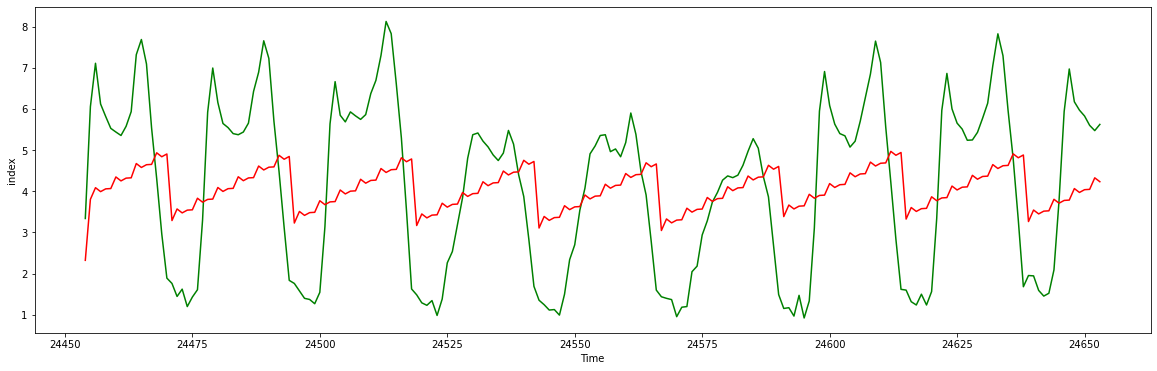

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(test['index'][:200], color='g',label='ground truth')   
plt.plot(pred.predicted_mean[:200], color='r',label='predicted')  
plt.xlabel('Time')
plt.ylabel('index')
plt.show()

In [44]:
orders[rmses.index(min_rmse)]
ss_orders[rmses.index(min_rmse)]

(1, 0, 1, 4)

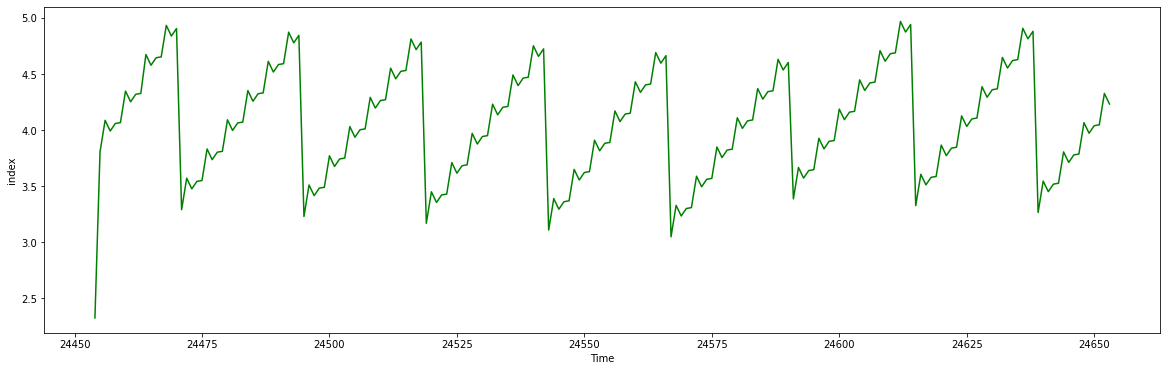

In [9]:
pred = best.get_prediction(start=test.index[0], end=test.index[-1], exog=test[['hour', 'dayofweek']], dynamic=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(pred.predicted_mean[:200], color='g',label='ground truth')   
plt.xlabel('Time')
plt.ylabel('index')
plt.show()

In [36]:
dummies_hour = pd.get_dummies(all_traffic['hour'])
dummies_year = pd.get_dummies(all_traffic['year'])
dummies_dayofweek = pd.get_dummies(all_traffic['dayofweek'])
pd.concat([dummies_hour, dummies_year, dummies_dayofweek], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,2020,2021,2022,0,1,2,3,4,5,6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34929,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
34930,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
34931,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
34932,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [37]:
pd.concat([all_traffic, dummies_hour, dummies_year, dummies_dayofweek], axis=1)

,datetime,index,hour,dayofweek,year,0,1,2,3,4,...,2020,2021,2022,0,1,2,3,4,5,6
0,2018-01-03 16:00:00+07:00,4.833333,16,2,2018,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2018-01-03 17:00:00+07:00,5.490909,17,2,2018,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2018-01-03 18:00:00+07:00,6.330769,18,2,2018,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2018-01-03 19:00:00+07:00,6.040000,19,2,2018,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2018-01-03 20:00:00+07:00,4.507692,20,2,2018,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34929,2021-12-31 20:00:00+07:00,2.900000,20,4,2021,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
34930,2021-12-31 21:00:00+07:00,2.836364,21,4,2021,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
34931,2021-12-31 22:00:00+07:00,2.246154,22,4,2021,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
34932,2021-12-31 23:00:00+07:00,1.672727,23,4,2021,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [67]:
print(orders[rmses.index(min_rmse)])
print(ss_orders[rmses.index(min_rmse)])

(0, 0, 1)
(1, 0, 1, 4)


In [106]:
import pandas as pd
import datetime
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
import warnings
warnings.filterwarnings("ignore")

traffic_2018 = pd.read_csv('../basedata/Traffics/trafficindex2018.csv')
traffic_2018['datetime'] = pd.to_datetime(traffic_2018['datetime'] + ' +07:00', format='%Y-%m-%dT%H:%M %z')
traffic_2019 = pd.read_csv('../basedata/Traffics/trafficindex2019.csv')
traffic_2019['datetime'] = pd.to_datetime(traffic_2019['datetime'] + ' +07:00', format='%Y-%m-%dT%H:%M %z')
traffic_2020 = pd.read_csv('../basedata/Traffics/trafficindex2020.csv')
traffic_2020['datetime'] = pd.to_datetime(traffic_2020['datetime'] + ' +07:00', format='%Y-%m-%dT%H:%M %z')
traffic_2021 = pd.read_csv('../basedata/Traffics/trafficindex2021.csv')
traffic_2021['datetime'] = pd.to_datetime(traffic_2021['datetime'] + ' +07:00', format='%Y-%m-%dT%H:%M %z')

all_traffic = pd.concat([traffic_2018, traffic_2019, traffic_2020, traffic_2021])
all_traffic['datetime'] = all_traffic['datetime'].dt.round('H')
all_traffic = all_traffic.groupby('datetime').mean()[['index']]
all_traffic.reset_index(inplace=True)
all_traffic['hour'] = all_traffic['datetime'].dt.hour
all_traffic['dayofweek'] = all_traffic['datetime'].dt.dayofweek
all_traffic['year'] = all_traffic['datetime'].dt.year
dummies_hour = pd.get_dummies(all_traffic['hour'], prefix='hour')
# dummies_year = pd.get_dummies(all_traffic['year'], prefix='year')
dummies_dayofweek = pd.get_dummies(all_traffic['dayofweek'], prefix='dayofweek')
all_traffic = pd.concat([all_traffic, dummies_hour, dummies_dayofweek], axis=1)
# all_traffic = pd.concat([all_traffic, dummies_hour, dummies_year, dummies_dayofweek], axis=1)
all_traffic.drop(columns=['hour', 'dayofweek', 'year'], inplace=True)
train_size = 24454
train = all_traffic[:train_size]
test = all_traffic[train_size:]

In [107]:
min_rmse = 200
order = (2, 1, 1)
best_model = 0
best_s = 0
for s in [3, 4, 12]:
    ss_order = (1, 0, 1, s)
    mod = SARIMAX(train['index'],
    exog=train.drop(columns=['index', 'datetime']),
    order=order,
    seasonal_order=ss_order,
    enforce_stationarity=False,
    enforce_invertibility=False)
    results = mod.fit()
    pred = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test.drop(columns=['index', 'datetime']), dynamic=False)
    rmse = math.sqrt(mean_squared_error(test['index'], pred.predicted_mean))
    if rmse < min_rmse:
        min_rmse = rmse
        best_s = s
        best_model = results

    print(s, rmse)
pred = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test.drop(columns=['index', 'datetime']), dynamic=False)
rmse = math.sqrt(mean_squared_error(test['index'], pred.predicted_mean))




At iterate   20    f=  4.89680D-01    |proj g|=  6.23275D-01

At iterate   25    f=  4.16649D-01    |proj g|=  1.61939D-01

At iterate   30    f=  3.99785D-01    |proj g|=  2.05153D-01

At iterate   35    f=  3.90412D-01    |proj g|=  4.61183D-02

At iterate   40    f=  3.81951D-01    |proj g|=  7.04000D-02

At iterate   45    f=  3.68132D-01    |proj g|=  2.06261D-01

At iterate   50    f=  3.63337D-01    |proj g|=  5.59193D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   37     50     77      1     0     0   5.592D-01   3.633D-01
  F =  0.36333713592918432     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

In [111]:
import pickle


In [115]:
model_file = open('sarimax.model', 'wb')
pickle.dump(best_model, model_file)
model_file.close()

In [114]:
model_file = open('sarimax.model', 'rb')
loaded = pickle.load(model_file)
model_file.close()

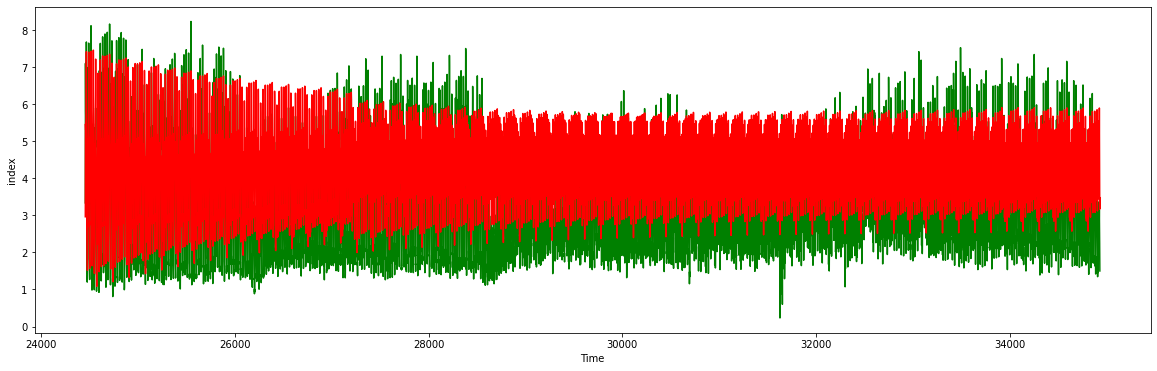

In [108]:
plt.figure(figsize=(20,6))
plt.plot(test['index'], color='g',label='ground truth')   
plt.plot(pred.predicted_mean, color='r',label='predicted')   
plt.xlabel('Time')
plt.ylabel('index')
plt.show()

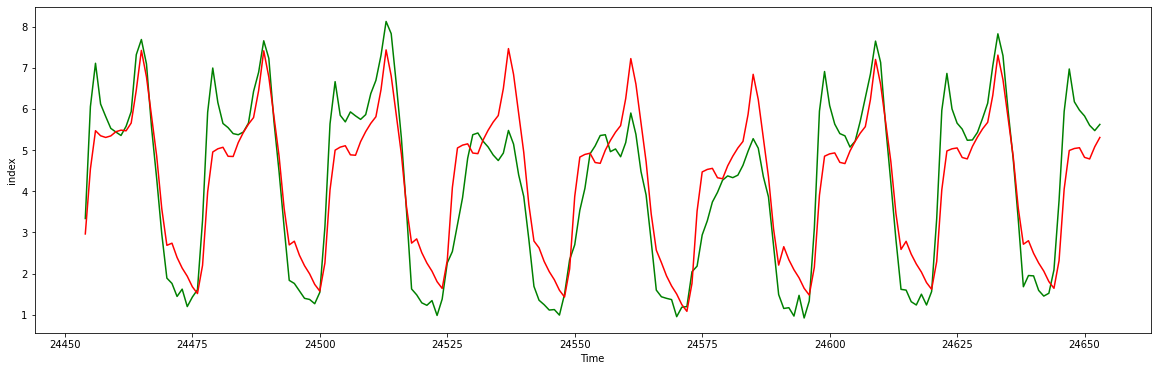

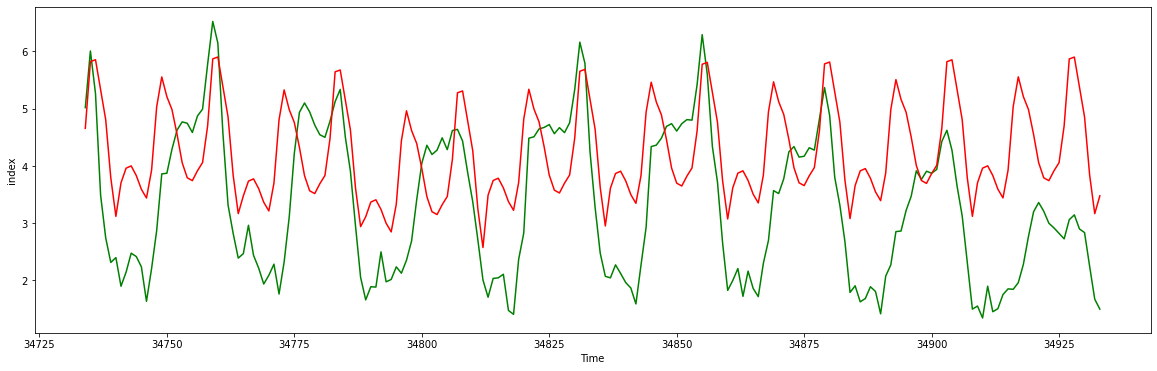

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(test['index'][:200], color='g',label='ground truth')   
plt.plot(pred.predicted_mean[:200], color='r',label='predicted')   
plt.xlabel('Time')
plt.ylabel('index')
plt.show()

plt.figure(figsize=(20,6))
plt.plot(test['index'][-200:], color='g',label='ground truth')   
plt.plot(pred.predicted_mean[-200:], color='r',label='predicted')   
plt.xlabel('Time')
plt.ylabel('index')
plt.show()

In [90]:
print('min_rmse :', min_rmse)
print('best_s :', best_s)
order = (0, 1, 1)
ss_order = (1, 0, 1, best_s)
ss_order = (1, 0, 1, s)
mod = SARIMAX(all_traffic['index'],
exog=all_traffic.drop(columns=['index', 'datetime']),
order=order,
seasonal_order=ss_order,
enforce_stationarity=False,
enforce_invertibility=False)
results = mod.fit()

min_rmse : 1.3742904353459564
best_s : 12
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           40     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.18840D+00    |proj g|=  3.60010D+00


 This problem is unconstrained.



At iterate    5    f=  8.15119D-01    |proj g|=  7.82012D-02

At iterate   10    f=  7.25692D-01    |proj g|=  1.14475D-01

At iterate   15    f=  5.97765D-01    |proj g|=  1.18849D-01

At iterate   20    f=  5.00134D-01    |proj g|=  6.79693D-01

At iterate   25    f=  4.74743D-01    |proj g|=  7.73614D-02

At iterate   30    f=  4.57962D-01    |proj g|=  4.18788D-02

At iterate   35    f=  4.49196D-01    |proj g|=  3.20677D-02

At iterate   40    f=  4.48017D-01    |proj g|=  5.38412D-03

At iterate   45    f=  4.47743D-01    |proj g|=  6.49097D-03

At iterate   50    f=  4.47560D-01    |proj g|=  1.15179D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

0.3760682285661952

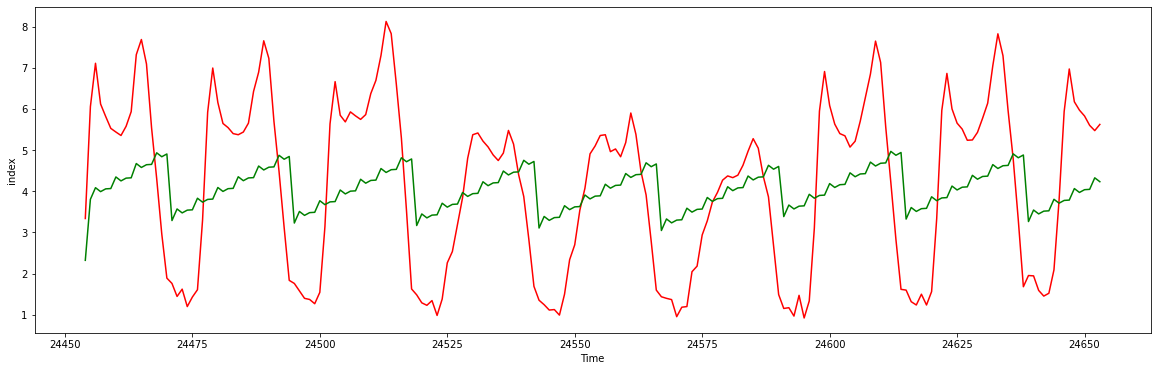

In [74]:
pred = best.get_prediction(start=test.index[0], end=test.index[-1], exog=test[['hour', 'dayofweek']], dynamic=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(test['index'][:200], color='r',label='Ground truth')
plt.plot(pred.predicted_mean[:200], color='g',label='Predicted')   
plt.xlabel('Time')
plt.ylabel('index')
plt.show()